In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install --quiet vietocr

In [ ]:
!pip install numpy==1.23.2

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
detector = Predictor(config)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~÷≥Φ '
dataset_params = {
    'name':'hw',
    'data_root':'./recog_data/',
    'train_annotation':'train.txt',
    'valid_annotation':'test.txt'
}

params = {
         'print_every':200, #200
         'valid_every':15*200, #15*200
          'iters':20000, #20000
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~÷≥Φ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './recog_data/',
  'train_annotation': 'train.txt',
  'valid_annotation': 'test.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},

In [ ]:
trainer = Trainer(config, pretrained=True)
# trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
transformer.embed_tgt.weight missmatching shape, required torch.Size([236, 256]) but found torch.Size([233, 256])
transformer.fc.weight missmatching shape, required torch.Size([236, 256]) but found torch.Size([233, 256])
transformer.fc.bias missmatching shape, required torch.Size([236]) but found torch.Size([233])
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 2984/2984 [00:00<00:00, 107170.53it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|███████████████████████████████| 2235/2235 [00:00<00:00, 105579.18it/s]


In [ ]:
trainer.config.save('config_reduce.yml')

###Lớp Masked Multi-head attention: chú ý các decode hidden state trước: tức là đưa 1 câu nhưng sẽ che(mask) đi 1 phần token ở *DEcoder hidden state *. Vì che đi thì nó mới tự học đc, chứ show hết ra thì học sao đc

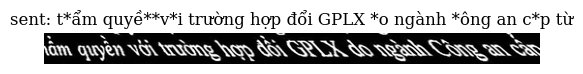

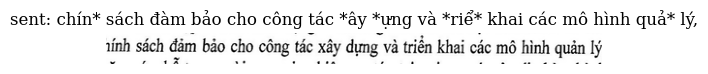

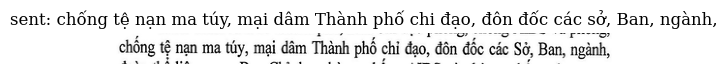

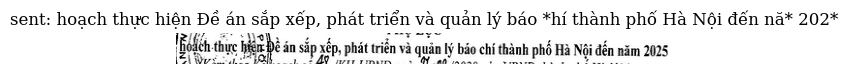

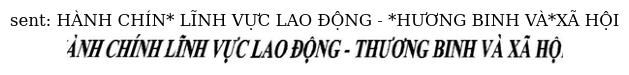

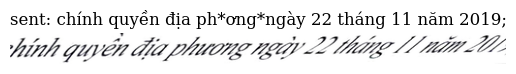

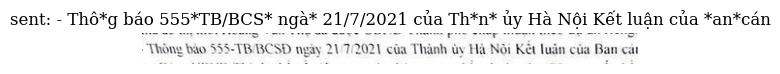

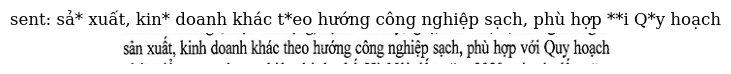

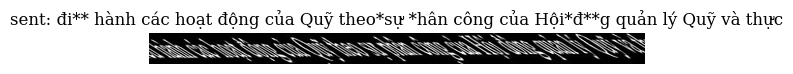

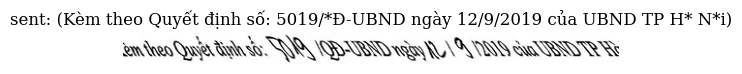

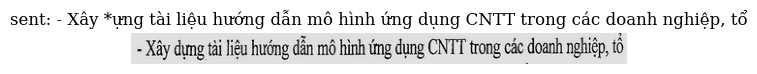

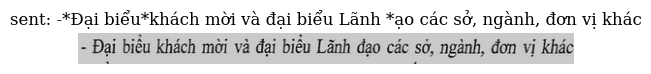

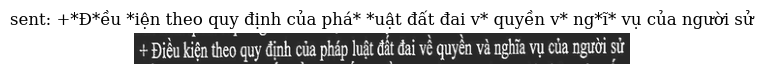

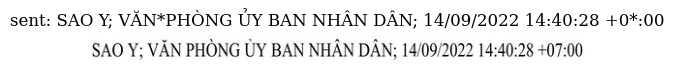

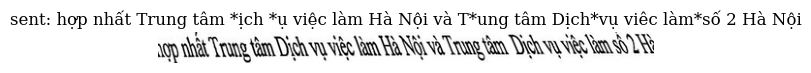

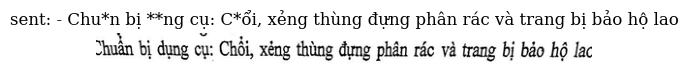

In [ ]:
trainer.visualize_dataset()

In [ ]:
trainer.train()

iter: 000200 - train loss: 2.971 - lr: 1.91e-05 - load time: 1.47 - gpu time: 67.56
iter: 000400 - train loss: 2.543 - lr: 3.95e-05 - load time: 1.58 - gpu time: 56.86
iter: 000600 - train loss: 2.294 - lr: 7.14e-05 - load time: 1.53 - gpu time: 52.24
iter: 000800 - train loss: 2.098 - lr: 1.12e-04 - load time: 1.82 - gpu time: 55.79
iter: 001000 - train loss: 1.520 - lr: 1.56e-04 - load time: 1.49 - gpu time: 53.21
iter: 001200 - train loss: 1.191 - lr: 2.01e-04 - load time: 1.06 - gpu time: 54.26
iter: 001400 - train loss: 0.879 - lr: 2.41e-04 - load time: 1.62 - gpu time: 54.69
iter: 001600 - train loss: 0.741 - lr: 2.73e-04 - load time: 1.67 - gpu time: 54.34
iter: 001800 - train loss: 0.667 - lr: 2.93e-04 - load time: 1.61 - gpu time: 53.05
iter: 002000 - train loss: 0.640 - lr: 3.00e-04 - load time: 1.98 - gpu time: 54.51
iter: 002200 - train loss: 0.622 - lr: 3.00e-04 - load time: 1.48 - gpu time: 53.53
iter: 002400 - train loss: 0.613 - lr: 3.00e-04 - load time: 1.42 - gpu time

In [ ]:
trainer.predict()

(['19/6/2015;',
  '2026 - 2030',
  'nhiệm vụ, giải',
  'Trung cấp trở',
  'trí việc làm)',
  'Xã Tiến Thắng',
  'Thư ký Hội',
  'QCVN102:',
  '12.900.000',
  'Ruộng Lính',
  'MN Tây Tựu',
  '40.979.003',
  '54.933.301',
  '50.236.867',
  'tuyến trên',
  'tại bộ phận',
  '- Như Điều 2;',
  'Chu Thị Hường',
  'H26.23.46',
  '15/12/2022',
  'QCVN102:',
  '456.813.333',
  'Giáp quận Hà',
  'Sở Văn hóa',
  'Vĩnh Quỳnh',
  '3. Sở Y tế',
  '57.168.682',
  'Bác sĩ (hạng III)',
  '18.296.943',
  'Chân Mạ 1',
  'Trên đất liền',
  'Trên đất liền',
  '1.9',
  'BTN',
  'tiêu',
  '115',
  'Hài',
  'BTN',
  'mặt',
  '242',
  'tiêu',
  '1,96',
  '1,17',
  'ĐH',
  'VT1',
  'Thời',
  '0,74',
  'số',
  'Anh',
  '983',
  'Hà',
  '249',
  'Xã',
  '163.',
  't',
  'khô',
  'Nữ',
  'DGT',
  'đất',
  'IV',
  'cấp',
  '50,0',
  '3.6',
  'Quận',
  'ngành.',
  'CV0969',
  'Thanh Tri',
  'quy hoạch',
  'Cuối đường',
  'BV.147',
  'hoạch điện',
  'L=32,1m;',
  'PT.146',
  'đương',
  'Email:',
  'con/ngày',
  'ST.0

In [ ]:
trainer.precision()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(0.8515625, 0.96088666)